<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Assignment_crime_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [3]:
url = 'https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/crime_data.csv'

In [4]:
df1 = pd.read_csv(url)

In [6]:
df1.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [7]:
df = df1.iloc[:,1:]

In [8]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [10]:
sns.set_style(style='darkgrid')

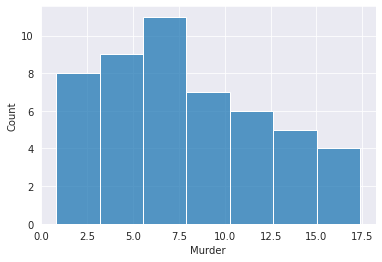

In [11]:
sns.histplot(df.Murder)

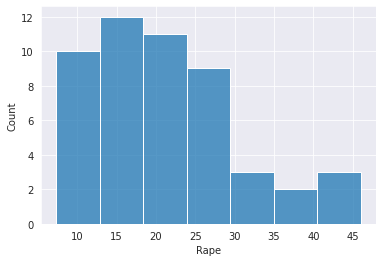

In [12]:
sns.histplot(df.Rape)

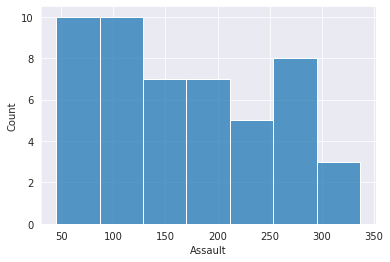

In [13]:
sns.histplot(df.Assault)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [15]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [20]:
ms = MinMaxScaler()

In [21]:
df_scaled =ms.fit_transform(df)

In [22]:
df_scaled

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

Clustering - AgglomerativeClustering

In [23]:
ac = AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

In [24]:
Model = ac.fit_predict(df_scaled)

In [27]:
Model

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [28]:
df1['AC_cluster'] = Model

In [33]:
df1.sort_values(by=['AC_cluster'])

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,AC_cluster
49,Wyoming,6.8,161,60,15.6,0
29,New Jersey,7.4,159,89,18.8,0
16,Kentucky,9.7,109,52,16.3,0
15,Kansas,6.0,115,66,18.0,0
34,Ohio,7.3,120,75,21.4,0
13,Indiana,7.2,113,65,21.0,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0
20,Massachusetts,4.4,149,85,16.3,0
10,Hawaii,5.3,46,83,20.2,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


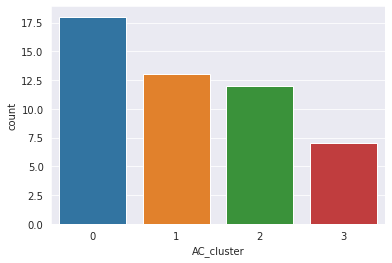

In [34]:
sns.countplot(df1['AC_cluster'])

Clustering KMeans

In [36]:
km =KMeans(n_clusters=4)

In [37]:
Km_model = km.fit_predict(df_scaled)

In [38]:
df1['KMeans'] = Km_model

In [39]:
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,AC_cluster,KMeans
0,Alabama,13.2,236,58,21.2,3,3
1,Alaska,10.0,263,48,44.5,1,2
2,Arizona,8.1,294,80,31.0,1,2
3,Arkansas,8.8,190,50,19.5,0,3
4,California,9.0,276,91,40.6,1,2
5,Colorado,7.9,204,78,38.7,1,2
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,1,2
9,Georgia,17.4,211,60,25.8,3,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


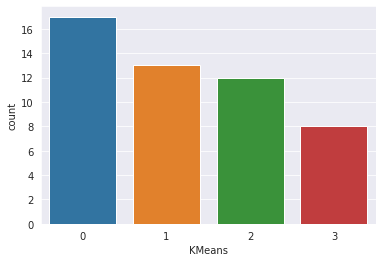

In [40]:
sns.countplot(df1['KMeans'])

Clustering - DBSCAN

In [49]:
clustering = DBSCAN(eps=0.3, min_samples=4).fit(df_scaled)

In [54]:
clustering.labels_
#Noisy samples are given the label -1.

array([ 0, -1,  1,  1, -1, -1,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

In [51]:
y = clustering.labels_
y.shape

(50,)

In [52]:
df1['DBSCAN'] = clustering.labels_

In [53]:
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,AC_cluster,KMeans,DBSCAN
0,Alabama,13.2,236,58,21.2,3,3,0
1,Alaska,10.0,263,48,44.5,1,2,-1
2,Arizona,8.1,294,80,31.0,1,2,1
3,Arkansas,8.8,190,50,19.5,0,3,1
4,California,9.0,276,91,40.6,1,2,-1
5,Colorado,7.9,204,78,38.7,1,2,-1
6,Connecticut,3.3,110,77,11.1,0,0,1
7,Delaware,5.9,238,72,15.8,0,0,-1
8,Florida,15.4,335,80,31.9,1,2,-1
9,Georgia,17.4,211,60,25.8,3,3,0


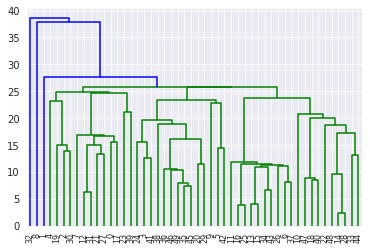

In [56]:
dendrogram = sch.dendrogram(sch.linkage(df, method='single'))

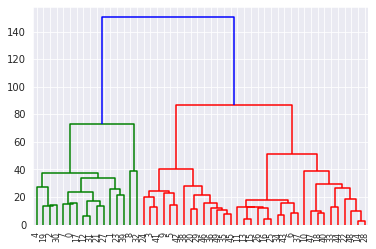

In [58]:
dendrogram = sch.dendrogram(sch.linkage(df, method='centroid'))

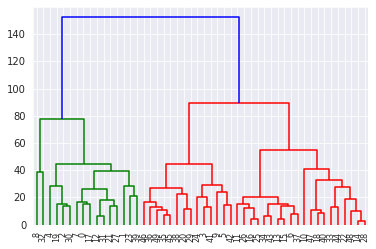

In [59]:
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))